# Neurocloud: Regression

In [33]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [35]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=20)
mpl.rc('ytick', labelsize=20)

# plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [22]:
# Loading Data

# Satisfaction Data
# https://stats.oecd.org/index.aspx?DataSetCode=BLI#
# Load data, extract interesting values, save reduced one
dat = pd.read_csv('/Users/dj/Documents/GitHub/project-neurocloud/data/happiness/satisfaction.csv')
sat = dat.loc[dat.Indicator == "Life satisfaction", :]
sat = sat.loc[sat.INEQUALITY == 'TOT', : ]
sat = sat.loc[sat.INDICATOR == 'SW_LIFS', : ]
sat = sat.loc[sat.Unit == 'Average score', : ]
sat = sat.loc[:, ['LOCATION', 'Country', 'Value']]
sat = sat.rename(columns={"Value": "Satisfaction"})

# GDP Data
# https://data.oecd.org/gdp/gross-domestic-product-gdp.htm
dat = pd.read_csv('/Users/dj/Documents/GitHub/project-neurocloud/data/happiness/GDP.csv')
gdp2 = dat.loc[dat.TIME == 2020, :]
gdp3 = gdp2.loc[gdp2.MEASURE == 'USD_CAP', :]
gdp = gdp3.loc[:, ['LOCATION','Value']]
gdp = gdp.rename(columns={"Value": "GDP"})

In [23]:
sat.head()

,LOCATION,Country,Satisfaction
35,AUS,Australia,7.1
36,AUT,Austria,7.2
37,BEL,Belgium,6.8
38,CAN,Canada,7.0
39,CZE,Czech Republic,6.9


In [24]:
gdp.head()

,LOCATION,GDP
122,AUS,55690.918600
226,AUT,57253.300563
330,BEL,54539.032525
443,CAN,47228.372488
507,CZE,42813.741340


# Merging the two DFs

In [25]:
merged_data = pd.merge(sat,gdp)

# Saving the data 

In [26]:
#merged_data.to_csv(path_or_buf='/Users/dj/Documents/GitHub/project-neurocloud/data/happiness/sat_gdp.csv', sep=',') # Save data

# Read the final data 

In [27]:
final_dat = pd.read_csv('/Users/dj/Documents/GitHub/project-neurocloud/data/happiness/sat_gdp.csv', index_col= 0)

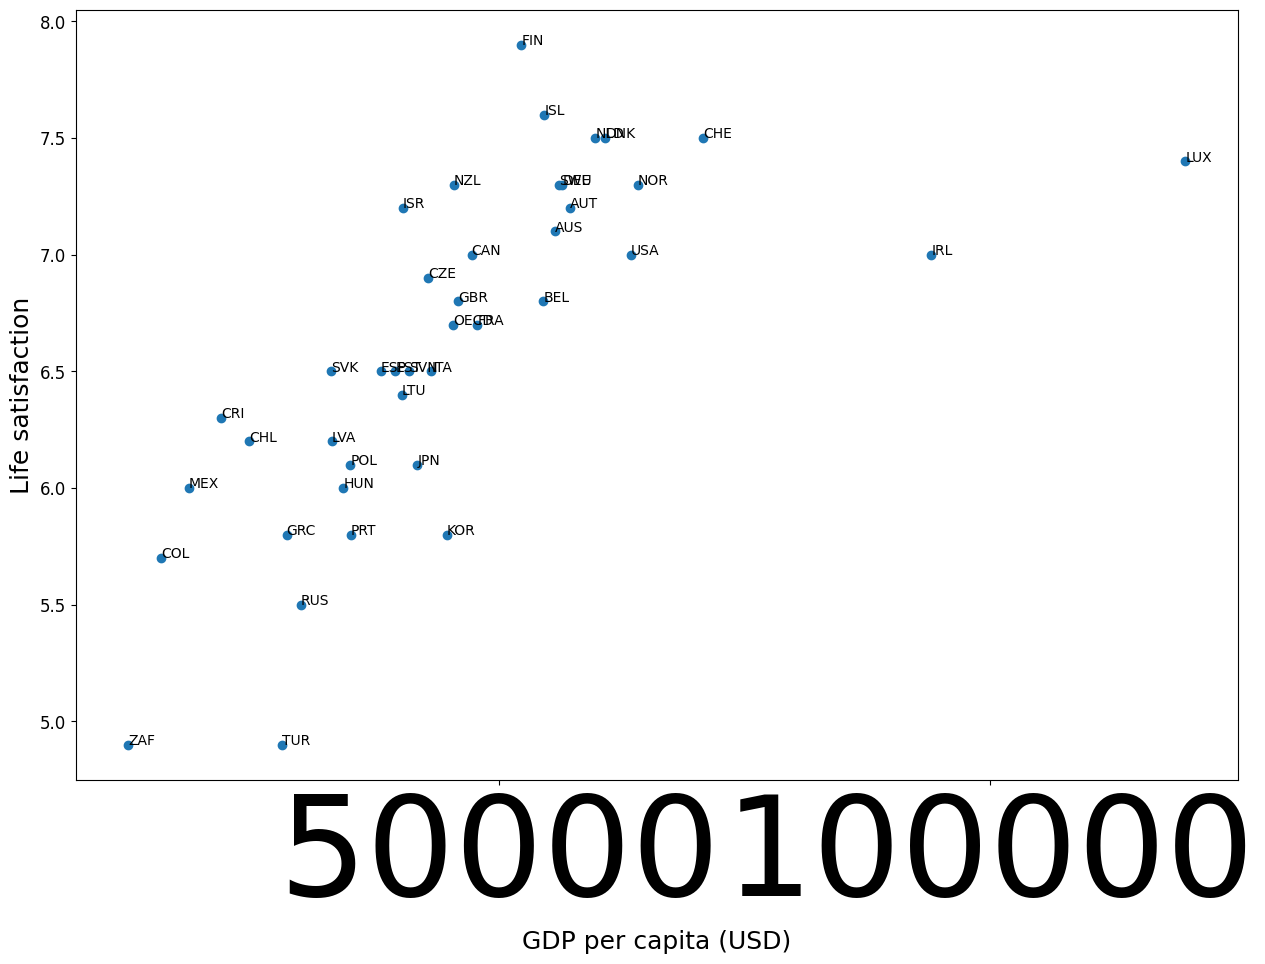

In [32]:
# Visualize the data
X = np.array(final_dat.GDP)
y = np.array(final_dat.Satisfaction)

fig, ax = plt.subplots(1, figsize=(15,10))
ax.scatter(X,y)

for i, txt in enumerate(final_dat.LOCATION):
    ax.annotate(txt, (X[i], y[i]))

ax.set_xlabel('GDP per capita (USD)', fontsize=18)
ax.set_ylabel('Life satisfaction', fontsize=18)
plt.show()

# Simple Linear Regression without Outliers

In [9]:
countries_remove = ['IRL', 'LUX']
remove_indices = [list(final_dat.LOCATION).index(i) for i in countries_remove]
keep_indices = list(set(range(final_dat.shape[0])) - set(remove_indices))
no_outliers_dat = final_dat.iloc[keep_indices]

X = np.array(no_outliers_dat.GDP)
y = np.array(no_outliers_dat.Satisfaction)

In [10]:
# Select a linear model
model_simpel = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model
model_simpel.fit(X[:, np.newaxis], y[:, np.newaxis])

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model_simpel.predict(X_new)) # outputs [[ 5.96242338]]

[[5.73847718]]


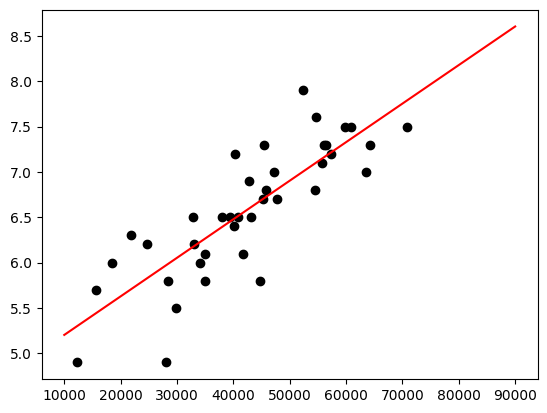

In [11]:
# Apply Model
x_fit = np.linspace(10000, 90000, 1000)
y_fit = model_simpel.predict(x_fit[:, np.newaxis])

# Plot
plt.scatter(X, y, c = 'black')
plt.plot(x_fit, y_fit, c = 'red')


# Linear Regression - All Data

In [12]:
X = np.array(final_dat.GDP)
y = np.array(final_dat.Satisfaction)

# Select a linear model
model = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Make a prediction for Cyprus
cyprus_gdp_per_capita = 22587
X_new = [[cyprus_gdp_per_capita]]  # Cyprus' GDP per capita
cyprus_sat_pred = model.predict(X_new)
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[6.02860494]]


# Visualisation

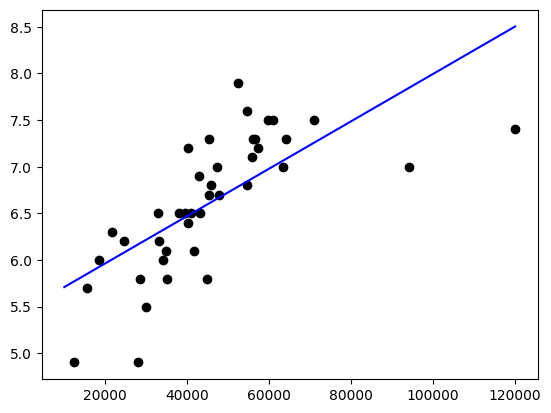

In [13]:
# Apply Model
x_fit_big = np.linspace(10000, 120000, 1000)
y_fit_big = model.predict(x_fit_big[:, np.newaxis])

# Plot
plt.scatter(X, y, c = 'black')
plt.plot(x_fit_big, y_fit_big, c = 'blue')

In [14]:
countries_remove = ['IRL', 'LUX']
remove_indices = [list(final_dat.LOCATION).index(i) for i in countries_remove]
keep_indices = list(set(range(final_dat.shape[0])) - set(remove_indices))
no_outliers_dat = final_dat.iloc[keep_indices]

# Both together

/opt/anaconda3/envs/neurocloud/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


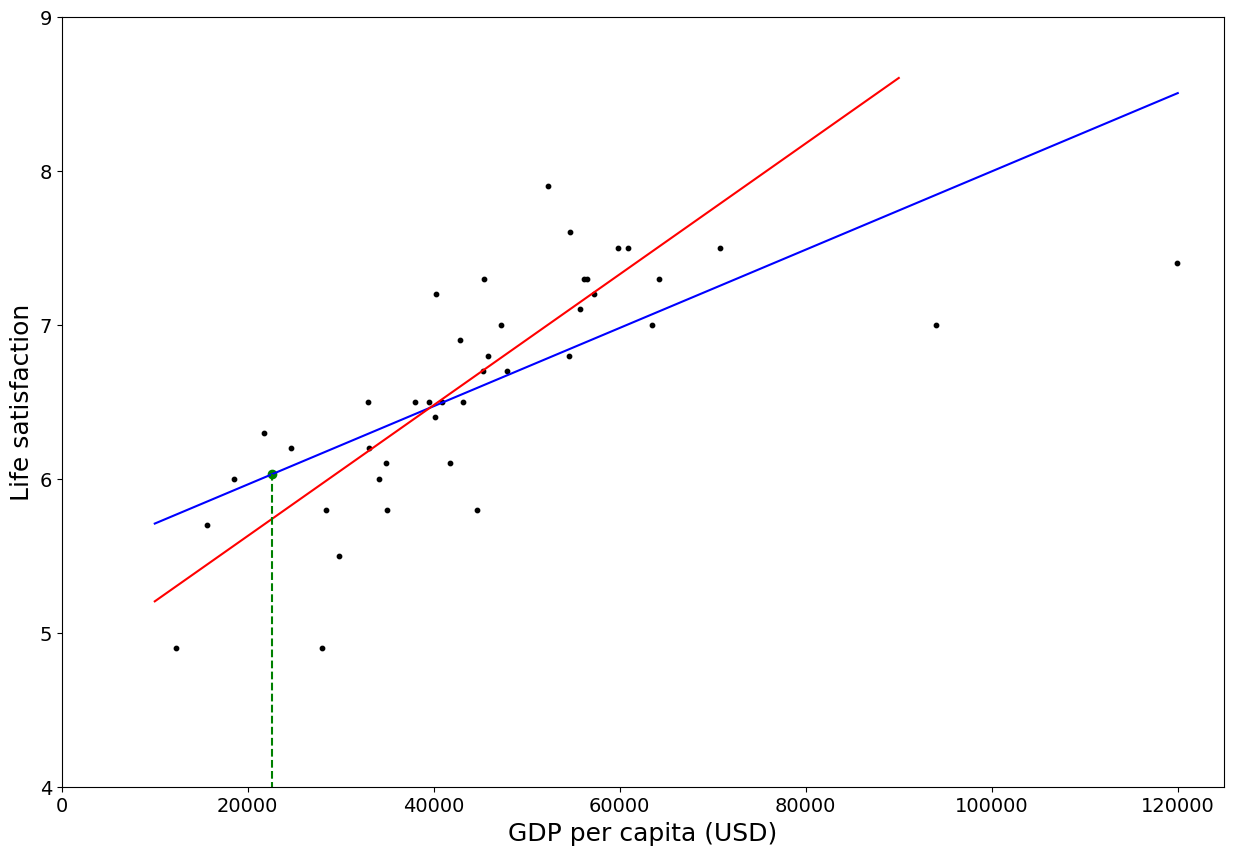

In [15]:
final_dat.plot(kind='scatter', x="GDP", y='Satisfaction', figsize=(15,10), s=10, c = 'black')
plt.axis([0, 125000, 4, 9])
plt.plot(x_fit_big, y_fit_big, c = 'blue')
plt.plot(x_fit, y_fit, c = 'red')
plt.scatter(cyprus_gdp_per_capita, cyprus_sat_pred, c = 'green')
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_sat_pred], "g--")

plt.xlabel("GDP per capita (USD)", fontsize = 18)
plt.ylabel("Life satisfaction", fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<AxesSubplot:xlabel='GDP', ylabel='Satisfaction'>

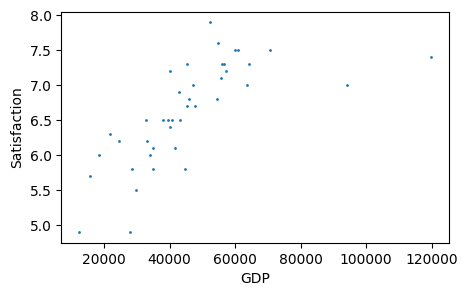

In [16]:
X = np.array(final_dat.GDP)
y = np.array(final_dat.Satisfaction)

final_dat.plot(kind='scatter', x="GDP", y='Satisfaction', figsize=(5,3), s=1)

In [17]:
final_dat.head()

,LOCATION,Country,Satisfaction,GDP
0,AUS,Australia,7.1,55690.918600
1,AUT,Austria,7.2,57253.300563
2,BEL,Belgium,6.8,54539.032525
3,CAN,Canada,7.0,47228.372488
4,CZE,Czech Republic,6.9,42813.741340


In [19]:
import os

dir = os.getcwd()

print(os.listdir())


['regression_Streamlit.py', '.ipynb_checkpoints', 'neurocloud_regression.ipynb']
